In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, poisson
import altair as alt
import scipy.stats as stats

alt.data_transformers.enable('vegafusion')


C:\Users\Yahan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


DataTransformerRegistry.enable('vegafusion')

# Variables

| Variable Name          | Role     | Type       | Description             | Units | Missing Values |
|------------------------|----------|------------|-------------------------|-------|----------------|
| Date                   | Feature  | Date       |The dates on which the shared bikes were rented.                         |       | no             |
| Rented Bike Count      | Feature  | Integer    |                         |       | no             |
| Hour                   | Feature  | Integer    | The hour on which the shared bikes were rented.                        |       | no             |
| Temperature            | Feature  | Continuous |  Temperature in Celsius for bike rental hour                         | ℃     | no             |
| Humidity               | Feature  | Integer    | Humidity for bike rental hour                        | %     | no             |
| Wind speed             | Feature  | Continuous | Wind speed in meters per second for bike rental hour                        | m/s   | no             |
| Visibility             | Feature  | Integer    |Distance at which objects are clearly visible under atmospheric conditions.                         | 10m   | no             |
| Dew point temperature  | Feature  | Continuous |The Celsius temperature at which air becomes saturated with water vapour and begins to condense. | ℃     | no             |
| Solar Radiation        | Feature  | Continuous |Solar radiation amount | Mj/m2 | no             |
| Rainfall               | Feature  | Integer    |Rainfall amount | mm    | no             |
| Snowfall               | Feature  | Integer    |                         | cm    | no             |
| Seasons                | Feature  | Categorical|                         |       | no             |
| Holiday                | Feature  | Binary     |                         |       | no             |
| Functioning Day        | Target   | Binary     |                         |       | no             |


# Import Data

In [2]:
seoulBike = pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')

seoulBike['Date'] = pd.to_datetime(seoulBike['Date'], format='%d/%m/%Y')
#seoulBike["Holiday"] = seoulBike["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
seoulBike['Month'] = seoulBike['Date'].dt.month
seoulBike['Seasons'] = pd.Categorical(seoulBike['Seasons'], 
                                      categories=['Spring', 'Summer', 'Autumn', 'Winter'], 
                                      ordered=True)
#seoulBike["Functioning Day"] = seoulBike["Functioning Day"].replace({'No': 0, 'Yes': 1})
def map_to_weekday(day_of_week):
    if day_of_week < 5:  
        return '1'
    else:
        return '0'
    
seoulBike['Weekday'] = seoulBike['Date'].dt.dayofweek
seoulBike['WeekdayOrNot'] = seoulBike['Date'].dt.dayofweek.apply(map_to_weekday)
seoulBike['WeekdayOrNot'] = seoulBike['WeekdayOrNot'].astype(int)

seoulBike = seoulBike[['Date', 'Month', "Weekday",'WeekdayOrNot', 'Hour', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']]


seoulBike

,Date,Month,Weekday,WeekdayOrNot,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,12,4,1,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,12,4,1,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,12,4,1,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,12,4,1,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,12,4,1,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,11,4,1,19,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,11,4,1,20,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,11,4,1,21,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,11,4,1,22,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
seoulBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Month                      8760 non-null   int64         
 2   Weekday                    8760 non-null   int64         
 3   WeekdayOrNot               8760 non-null   int32         
 4   Hour                       8760 non-null   int64         
 5   Rented Bike Count          8760 non-null   int64         
 6   Temperature(°C)            8760 non-null   float64       
 7   Humidity(%)                8760 non-null   int64         
 8   Wind speed (m/s)           8760 non-null   float64       
 9   Visibility (10m)           8760 non-null   int64         
 10  Dew point temperature(°C)  8760 non-null   float64       
 11  Solar Radiation (MJ/m2)    8760 non-null   float64       
 12  Rainfa

In [4]:
seoulBike.isnull().sum()

Date                         0
Month                        0
Weekday                      0
WeekdayOrNot                 0
Hour                         0
Rented Bike Count            0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing data in the seoulBike dataframe

In [5]:
seoulBike.describe()

,Month,Weekday,WeekdayOrNot,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,6.526027,3.002740,0.715068,11.500000,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,3.448048,1.998056,0.451408,6.922582,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,1.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,5.750000,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,7.000000,3.000000,1.000000,11.500000,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,10.000000,5.000000,1.000000,17.250000,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,12.000000,6.000000,1.000000,23.000000,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data Distribution

## 这里画violin plot

In [6]:
X = seoulBike.drop(["Rented Bike Count", "Functioning Day"], axis=1)
y1 = seoulBike["Rented Bike Count"]
y2 = seoulBike["Functioning Day"]

## Independent variable distribution

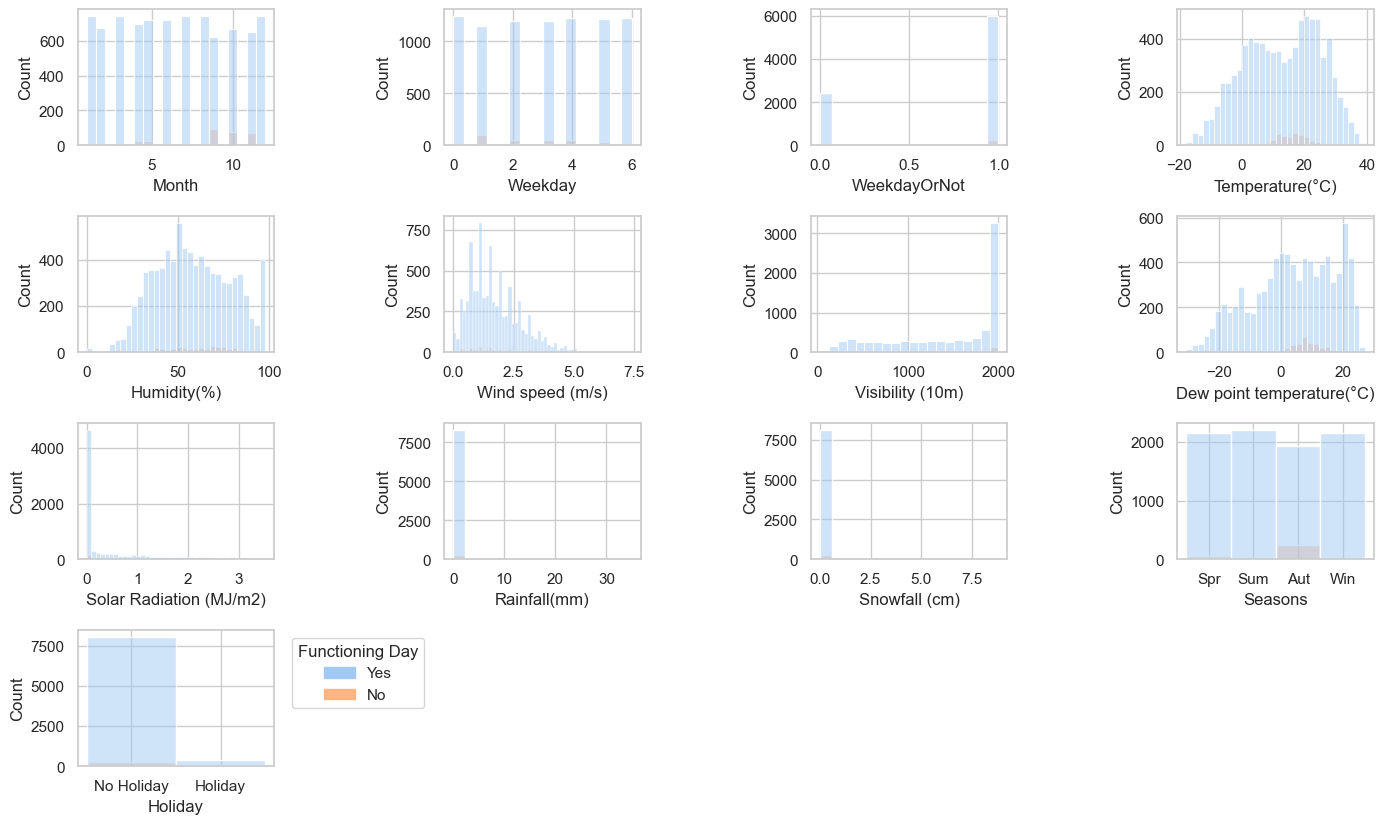

In [7]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(14, 10))

variables = X.drop(["Date","Hour"], axis=1).columns

current_palette = sns.color_palette()
light_blue = current_palette[0]  
light_orange = current_palette[1] 

#color_map = {1: light_blue, 0: light_orange}
color_map = {"Yes": light_blue, "No": light_orange}


seasons_map = {
    'Spring': 'Spr', 'Summer': 'Sum', 'Autumn': 'Aut', 'Winter': 'Win'
}

for i, var in enumerate(variables):
    plt.subplot(5, 4, i + 1)
    if var == "Seasons":
        temp_data = seoulBike.copy()
        temp_data['Seasons'] = temp_data['Seasons'].map(seasons_map)
        sns.histplot(data=temp_data, x='Seasons', hue='Functioning Day', palette=color_map, legend=False)
    else:
        sns.histplot(data=seoulBike, x=var, hue='Functioning Day', palette=color_map, legend=False)

handles = [plt.Rectangle((0,0),1,1, color=color_map[label]) for label in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Functioning Day', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Pairs plot

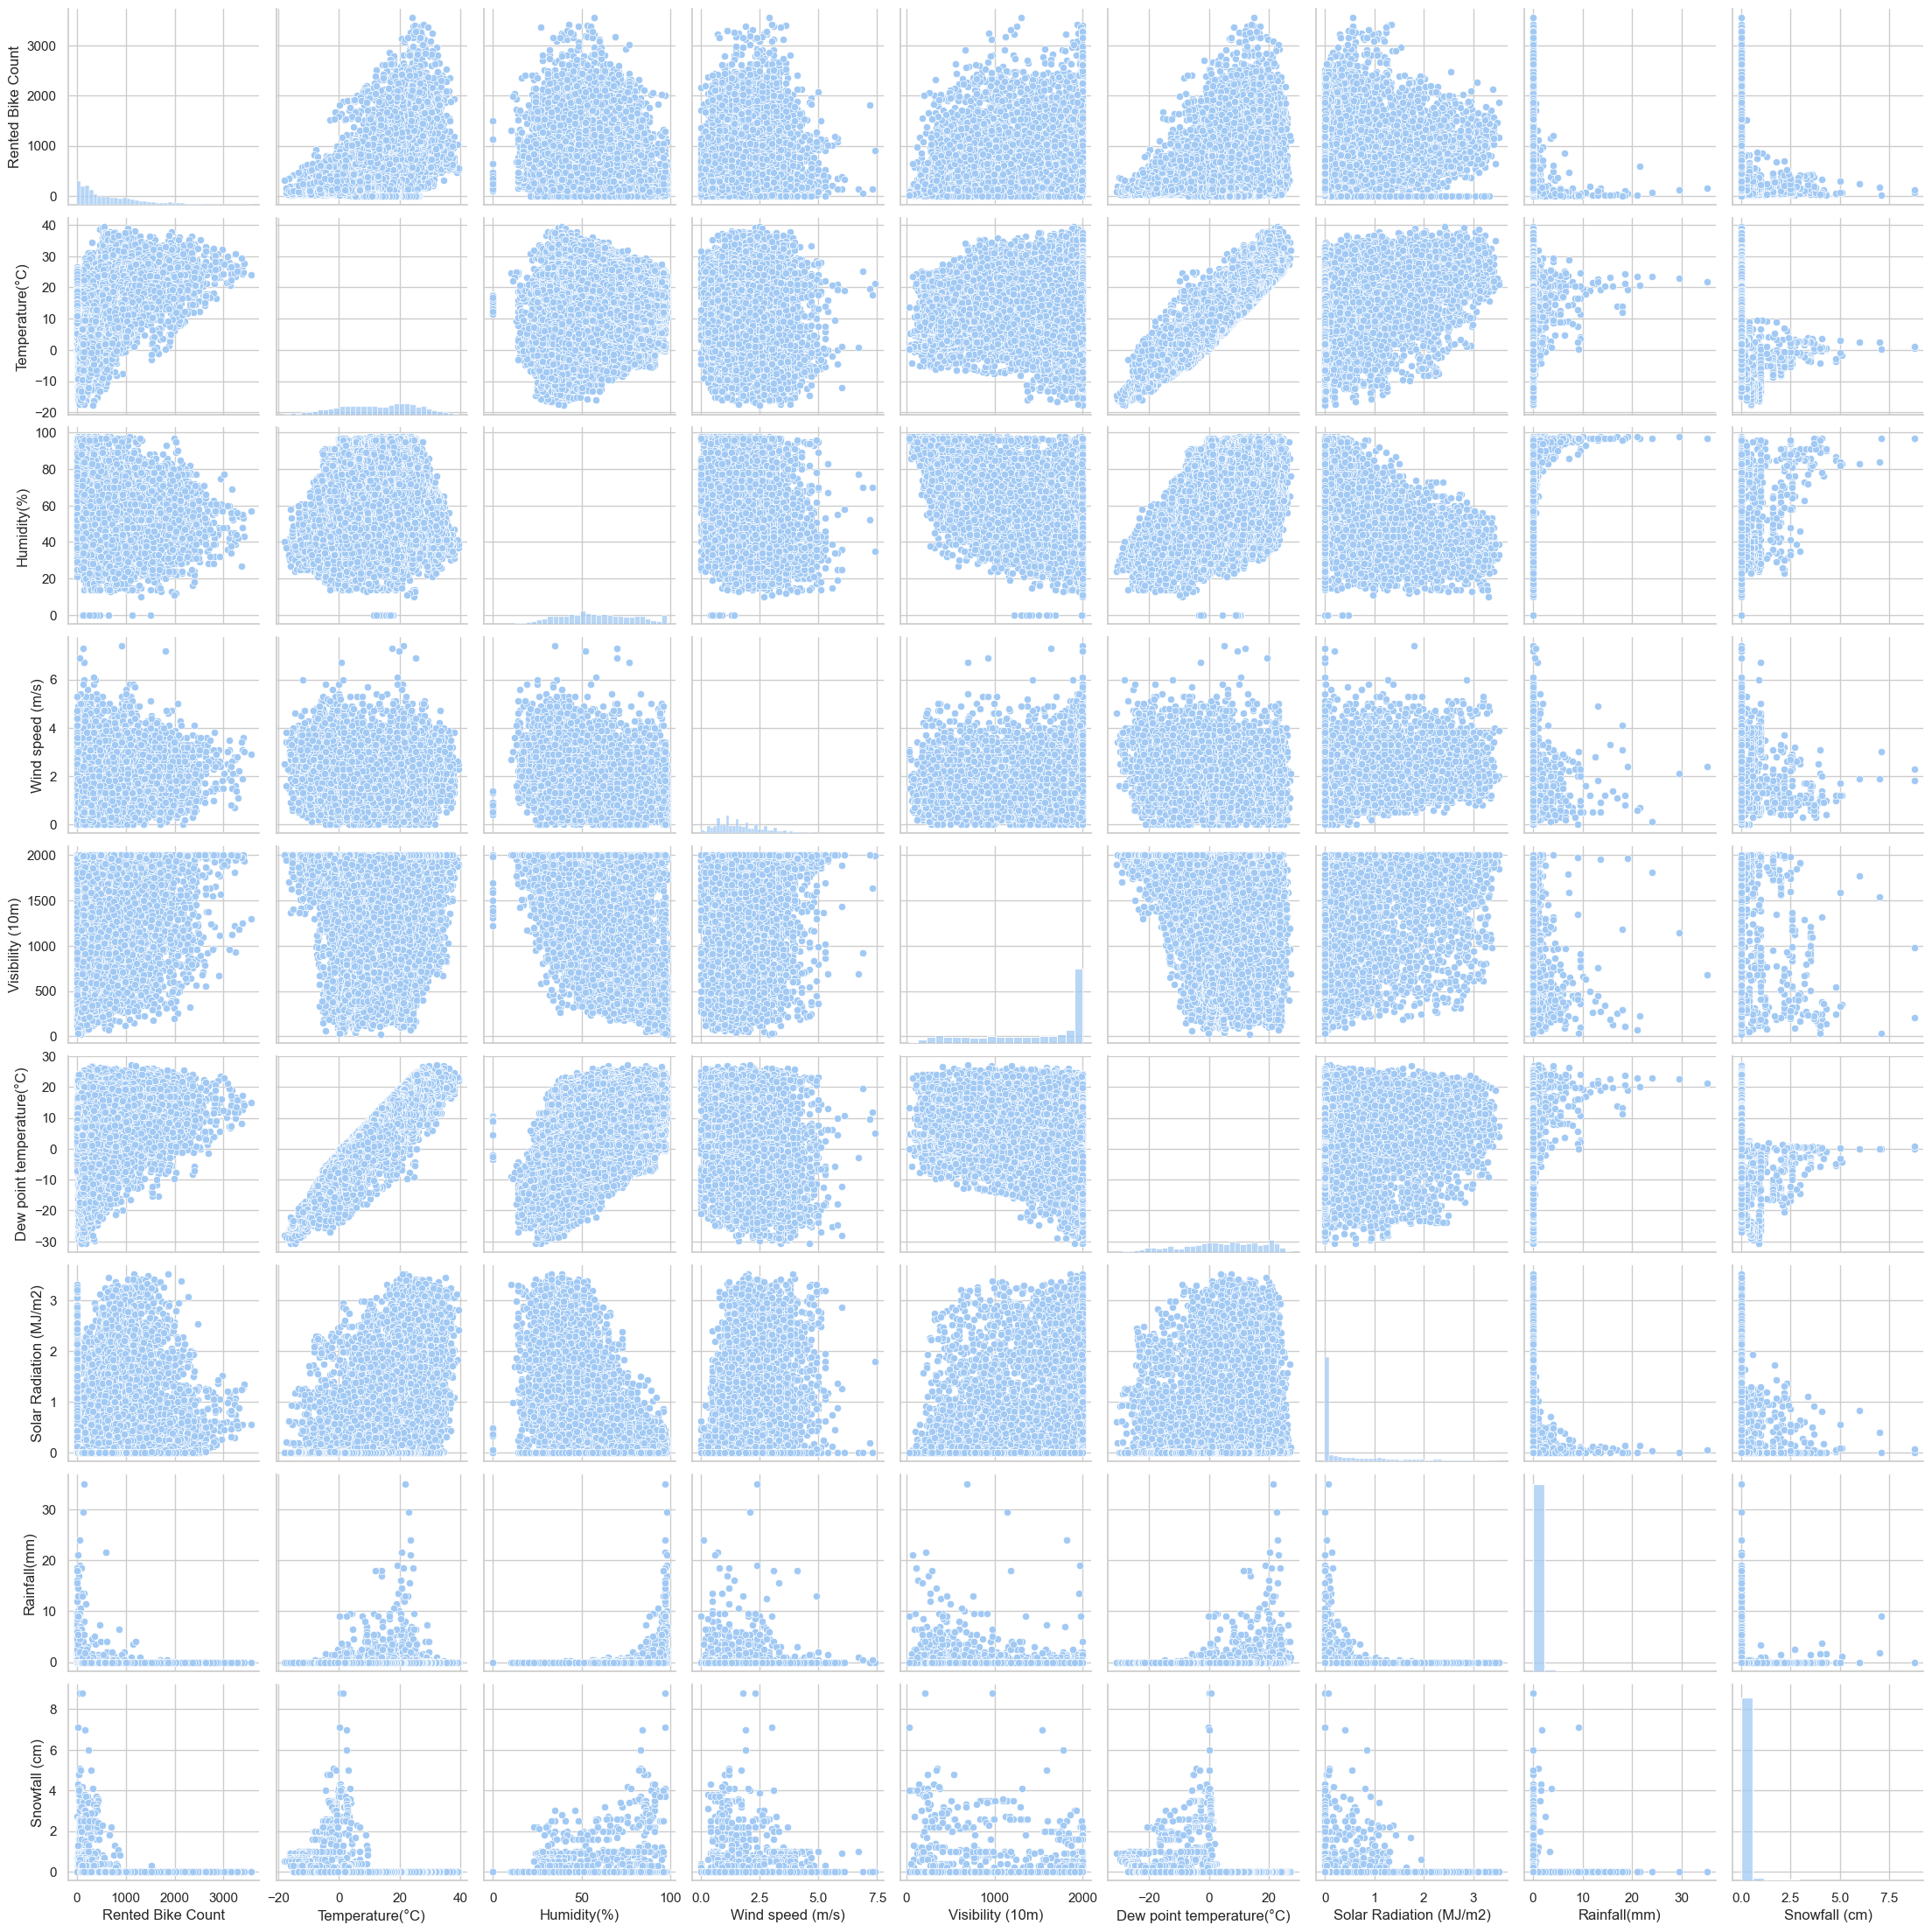

In [10]:
sns.pairplot(seoulBike.drop(["Functioning Day","Month","Weekday","WeekdayOrNot","Hour"], axis = 1))
plt.show()

In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif = seoulBike.select_dtypes(include=['int64', 'float64'])
#data_vif = data_vif.drop(labels = ["Rented Bike Count","Holiday"], axis = 1)
data_vif = data_vif.drop(labels = ["Rented Bike Count"], axis = 1)


data_vif['Intercept'] = 1
data_vif
vif_data = pd.DataFrame()
vif_data["feature"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(len(data_vif.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted

,feature,VIF
11,Intercept,398.916449
7,Dew point temperature(°C),116.494385
3,Temperature(°C),87.729551
4,Humidity(%),20.487890
8,Solar Radiation (MJ/m2),2.021605
6,Visibility (10m),1.601009
5,Wind speed (m/s),1.296868
2,Hour,1.185122
0,Month,1.115533
10,Snowfall (cm),1.107586


From the pairs plot and the VIF report, we have seen that the `Dew point temperature` has high correlation with `Temperature`, it will cause high multicollinearly in the model. If we want to use linear model in analysis, we might need to remove the `Dew point temperature` to reduce collinearly.

## Explore response variables' distribution

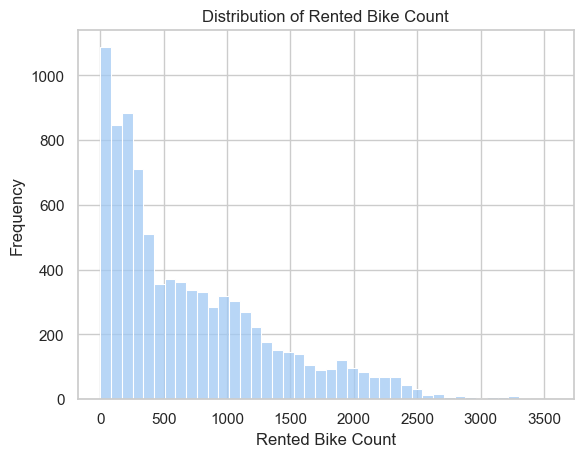

In [12]:
sns.histplot(y1) 
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Gamma test

from scipy.stats import gamma, kstest

data = y1

params = gamma.fit(data)

gamma_dist = gamma(*params)

ks_stat, ks_p_value = kstest(data, gamma_dist.cdf)

print(f"KS Statistic: {ks_stat}, P-value: {ks_p_value}")


KS Statistic: 0.1322315231872091, P-value: 5.037582228513406e-134


Rented Bike Count does not follow gamma distribution

In [14]:
# poisson test
 
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y1, 'poisson', args=(np.mean(y1),))
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow poisson distribution")
else:
    print("y follows poisson distribution")

Kolmogorov-Smirnov statistic: 0.5588529934657052
p-value: 0.0
y does not follow poisson distribution


From the KS test and histogram above, we can see that the original data does not follow neither normal distribution nor poisson distribuion

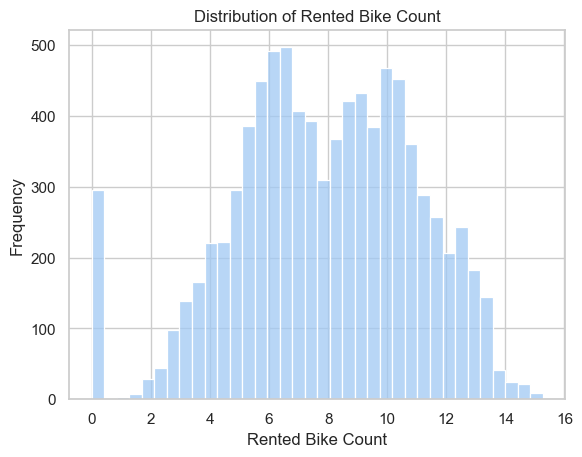

In [15]:
sns.histplot(y1**(1/3)) 
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

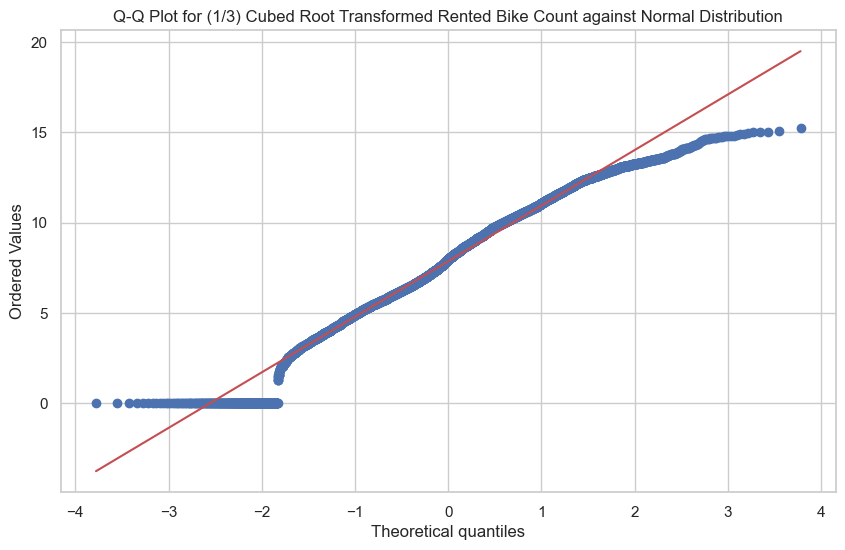

In [16]:
## QQ plot for data transfer
plt.figure(figsize=(10, 6))
stats.probplot(y1**(1/3), dist="norm", plot=plt)
plt.title('Q-Q Plot for (1/3) Cubed Root Transformed Rented Bike Count against Normal Distribution')
plt.show()

In [17]:
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y1**(1/3), 'norm')
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow normal distribution")
else:
    print("y follows normal distribution")

Kolmogorov-Smirnov statistic: 0.9517831698756737
p-value: 0.0
y does not follow normal distribution


In [18]:
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y1**(1/3), 'poisson', args=(np.mean(y1),))
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow poisson distribution")
else:
    print("y follows poisson distribution")

Kolmogorov-Smirnov statistic: 1.0
p-value: 0.0
y does not follow poisson distribution


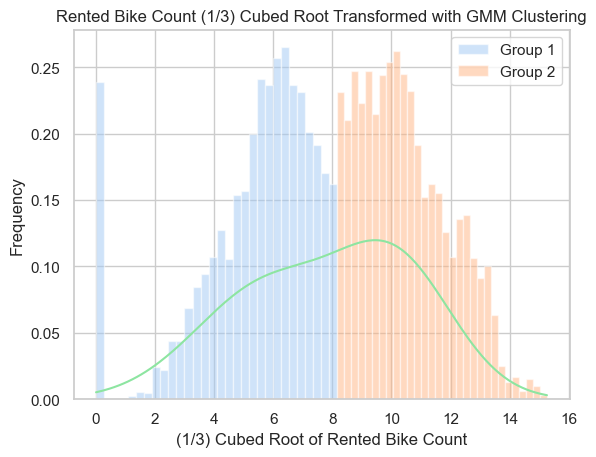

In [19]:
from sklearn.mixture import GaussianMixture

transformed_counts = (y1**(1/3)).values.reshape(-1, 1)

# use Gaussian Mixture Model(GMM)
gmm = GaussianMixture(n_components=2, random_state=0).fit(transformed_counts)
group = gmm.predict(transformed_counts)

xr = np.linspace(transformed_counts.min(), transformed_counts.max(), 200).reshape(-1,1)
density = np.exp(gmm.score_samples(xr))
# print(density)
# print(gmm.means_)
# print(gmm.covariances_)
# print(gmm.weights_)

plt.hist(transformed_counts[group == 0], bins=30, alpha=0.5, label='Group 1',density = True)
plt.hist(transformed_counts[group == 1], bins=30, alpha=0.5, label='Group 2', density = True)
# plt.hist(transformed_counts[group == 2], bins=30, alpha=0.5, label='Group 2', density = True)
# plt.hist(transformed_counts[group == 3], bins=30, alpha=0.5, label='Group 2', density = True)
plt.plot(xr,density)

plt.legend()
plt.title('Rented Bike Count (1/3) Cubed Root Transformed with GMM Clustering')
plt.xlabel('(1/3) Cubed Root of Rented Bike Count')
plt.ylabel('Frequency')



plt.show()


From the histogram above, we can see that GMM is not suitable for data clusting.

# EDA

In [20]:
aggregation_date = {
    #'Rented Bike Count': ['mean','max','min'],
    'Rented Bike Count': 'sum',
    #'Hour': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'mean',
    'Snowfall (cm)': 'mean',
    'Functioning Day': "first",
    'Seasons': 'first',
    'Holiday': 'first',
    "Weekday": "first",
    "WeekdayOrNot": "first"
}

day_bike = seoulBike.groupby('Date').agg(aggregation_date)
day_bike.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons,Holiday,Weekday,WeekdayOrNot
Date,,,,,,,,,,,,,,
2017-12-01,9539,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.0,Yes,Winter,No Holiday,4,1
2017-12-02,8523,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.0,Yes,Winter,No Holiday,5,0
2017-12-03,7222,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.0,Yes,Winter,No Holiday,6,0
2017-12-04,8729,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.0,Yes,Winter,No Holiday,0,1
2017-12-05,8307,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.0,Yes,Winter,No Holiday,1,1


Text(0.5, 1.0, 'Count of Functioning Day')

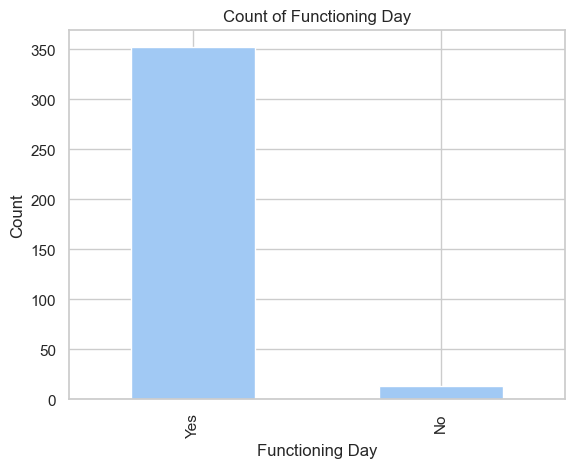

In [21]:
functioning_day_count = day_bike['Functioning Day'].value_counts()
functioning_day_count.plot(kind='bar')

plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.title('Count of Functioning Day')

In [22]:
chart_season = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Seasons"),
    alt.Y("count()"),
    color="Functioning Day",
).properties(
    width = 230,
    height = 250
)

chart_holiday = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Holiday"),
    alt.Y("count()"),
    color="Functioning Day",
    size=alt.Size(value = 20)  
).properties(
    width = 230,
    height = 250
)

chart_weekday = alt.Chart(day_bike).mark_line().encode(
    alt.X("Weekday"),
    alt.Y("count()"),
    color="Functioning Day",
    #size=alt.Size(value=20)  
).properties(
    width = 230,
    height = 250
)
chart_season | chart_weekday | chart_holiday

alt.HConcatChart(...)

No function day集中出现在春秋。no functionday几乎全部出现在no holiday

In [122]:
FunctionBike = seoulBike[seoulBike["Functioning Day"] == "Yes"]
hours_bike = FunctionBike.groupby(["Hour","Holiday"]).mean().reset_index()
hours_bike.head()

# hour_holiday_plot_1 = alt.Chart(hours_bike).mark_bar().encode(
#     alt.X("Hour"),
#     alt.Y("Rented Bike Count"),
#     color = "Holiday"
# )
hour_holiday_plot = alt.Chart(hours_bike).mark_line().encode(
    alt.X("Hour", title="Hour of the Day"),
    alt.Y("Rented Bike Count", title="Rented Bike Count"),
    color=alt.Color("Holiday", legend=alt.Legend(title="Holiday"))
).properties(
    title="Hourly Rented Bike Counts by Holiday"
)

hour_holiday_plot.display()


alt.Chart(...)

In [121]:
hours_season_bike = seoulBike.groupby(["Hour","Seasons"]).mean().reset_index()
hours_season_bike.head()

# hour_season_plot_1 = alt.Chart(hours_season_bike).mark_bar().encode(
#     alt.X("Hour"),
#     alt.Y("Rented Bike Count"),
#     color=alt.Color("Seasons", scale=alt.Scale(scheme='tableau10'))  # Change color scheme
# )

hour_season_plot = alt.Chart(hours_season_bike).mark_line().encode(
    alt.X("Hour", title="Hour of the Day"),
    alt.Y("Rented Bike Count", title="Rented Bike Count"),
    color=alt.Color("Seasons", legend=alt.Legend(title="Seasons"), scale=alt.Scale(scheme='tableau10'))  # Change color scheme
).properties(
    title="Hourly Rented Bike Counts by Season"
)

hour_season_plot.display()


alt.Chart(...)

In [120]:
FunctionBike = seoulBike[seoulBike["Functioning Day"] == "Yes"]
hours_bike = FunctionBike.groupby(["Hour","WeekdayOrNot"]).mean().reset_index()
hours_bike["WeekdayOrNot"] = hours_bike["WeekdayOrNot"].astype('category')
hours_bike.head()

hour_plot_work = alt.Chart(hours_bike).mark_line().encode(
    alt.X("Hour", title="Hour of the Day"),
    alt.Y("Rented Bike Count", title="Rented Bike Count"),
    color=alt.Color("WeekdayOrNot", legend=alt.Legend(title="WeekdayOrNot"), scale=alt.Scale(scheme='tableau10'))
).properties(
    title="Hourly Rented Bike Counts by Weekday"
)

hour_plot_work.display()


alt.Chart(...)

共享单车的使用高峰集中在早晚高峰期，其他情况下no holiday的单车需求与holiday虽然也较多，但相差不大。

In [27]:
# Sum up "Rented Bike Count" for each day
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()

# # Extract month from the date
daily_bike_sum['Month'] = daily_bike_sum['Date'].dt.month
daily_bike_sum

# # Group by both "Date" and "Month" to sum up for each day
daily_bike_sum = daily_bike_sum.groupby(['Date', 'Month'])['Rented Bike Count'].sum().reset_index()
daily_bike_sum

# # Group by "Month" to calculate mean, max, and min
monthly_bike_stats = daily_bike_sum.groupby('Month')['Rented Bike Count'].agg(['mean', 'max', 'min']).reset_index()

monthly_bike_stats['Month'] = monthly_bike_stats['Month'].astype('category')

base = alt.Chart(monthly_bike_stats).encode(
    alt.X('Month:O', title='Month', axis=alt.Axis(labelAngle=0))  
).properties(
    width=500,
    height=300
)

mean_line = base.mark_line(color='blue').encode(
    alt.Y('mean:Q', title='Average Rented Bike Count')
)

error_bars = base.mark_errorbar(
    color='green',  
    size=2,      
    ticks=True 
).encode(
    alt.Y('min:Q'),
    alt.Y2('max:Q')
)

final_chart = error_bars + mean_line

final_chart.display()

alt.LayerChart(...)

In [28]:
# Sum up "Rented Bike Count" for each day
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()

# Extract weekday from the date (Monday=0, Sunday=6)
daily_bike_sum['Weekday'] = daily_bike_sum['Date'].dt.dayofweek

# Group by both "Date" and "Weekday" to sum up for each day
daily_bike_sum = daily_bike_sum.groupby(['Date', 'Weekday'])['Rented Bike Count'].sum().reset_index()

# Group by "Weekday" to calculate mean, max, and min
weekday_bike_stats = daily_bike_sum.groupby('Weekday')['Rented Bike Count'].agg(['mean', 'max', 'min']).reset_index()
weekday_bike_stats

,Weekday,mean,max,min
0,0,17533.519231,33257,977
1,1,17887.416667,35349,3360
2,2,18479.120000,36149,3154
3,3,17239.980000,34621,1721
4,4,18634.000000,35103,2593
5,5,17362.588235,34360,2693
6,6,15297.921569,32487,2014


In [74]:
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()
daily_bike_sum['Weekday'] = daily_bike_sum['Date'].dt.dayofweek

# Ensure the 'Weekday' column has descriptive names 
weekday_names = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_bike_sum['Weekday Name'] = daily_bike_sum['Weekday'].apply(lambda x: weekday_names[x])

name_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

chart_week = alt.Chart(daily_bike_sum).mark_boxplot().encode(
    x=alt.X('Weekday Name:N', title='Day of the Week', sort=name_order),  # Use the named weekdays for x-axis
    y=alt.Y('Rented Bike Count:Q', title='Rented Bike Count')
).properties(
    title='Boxplot of Rented Bike Counts by Weekday',
    width = 350
)

In [77]:
daily_bike_sum = FunctionBike.groupby(["Date"])["Rented Bike Count"].sum().reset_index()
daily_bike_sum['Weekday'] = daily_bike_sum['Date'].dt.dayofweek
daily_bike_sum['WeekdayOrNot'] = daily_bike_sum['Weekday'].apply(lambda x: 1 if x < 5 else 0)
daily_bike_sum['WeekdayOrNot'] = daily_bike_sum['WeekdayOrNot'].astype('category')
daily_bike_sum

# Map 'WeekdayOrNot' to more descriptive labels for better readability in the plot
daily_bike_sum['Day Type'] = daily_bike_sum['WeekdayOrNot'].map({1: 'Weekday', 0: 'Weekend'})

# Create the box plot
chart_workday = alt.Chart(daily_bike_sum).mark_boxplot(size = 100).encode(
    x=alt.X('Day Type:N', title='Day Type'),  # Nominally encode the 'Day Type' as the x-axis
    y=alt.Y('Rented Bike Count:Q', title='Rented Bike Count'),  # Quantitatively encode 'Rented Bike Count' as the y-axis,
    #color = 'Day Type'
).properties(
    title='Distribution of Rented Bike Counts by Day Type',
    width = 300
)

(chart_week | chart_workday).display()

alt.HConcatChart(...)

# Classification

## Data aggregate

In [23]:
aggregation_date = {
    #'Rented Bike Count': ['mean','max','min'],
    'Rented Bike Count': 'sum',
    #'Hour': 'mean',
    "Month":'first',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'mean',
    'Snowfall (cm)': 'mean',
    'Functioning Day': "first",
    'Seasons': 'first',
    'Holiday': 'first',
    "Weekday": "first",
    "WeekdayOrNot": "first"
}

day_bike = seoulBike.groupby('Date').agg(aggregation_date)
bike_day = day_bike.copy().reset_index()
bike_day = bike_day.drop(["Rented Bike Count","Date"], axis = 1)
bike_day["Holiday"] = bike_day["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
bike_day["Functioning Day"] = bike_day["Functioning Day"].replace({'No': 0, 'Yes': 1})
bike_day = pd.get_dummies(bike_day, columns = ["Seasons"])
bike_day.head()
bike_day_X = bike_day.drop(["Functioning Day"], axis = 1)
bike_day_y = bike_day["Functioning Day"]

## SMOTE Resampling

Since the original data is unbalanced, we use SMOTE to resample the data

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(bike_day_X, bike_day_y)
print(np.sum(y_resampled == 0),np.sum(y_resampled == 1))

352 352


## Split Train and Test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

print(X_train.shape[0], len(y_train))
print(X_test.shape[0],len(y_test))

563 563
141 141


## Decision Tree:



In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


clf_train_accuracy = clf.score(X_train, y_train)
clf_test_accuracy = clf.score(X_test, y_test)
print(f"Decision Tree training score is {clf_train_accuracy}, test score is {clf_test_accuracy}")

confusionmatrix = confusion_matrix(y_test,y_pred)
print("Decision Tree's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Decision Tree is {accuracy_score(y_test,y_pred)}")

report = metrics.classification_report(y_test,y_pred)
print("Classification metrics for Decision Tree model:")
print(report)

Decision Tree training score is 1.0, test score is 0.9361702127659575
Decision Tree's confusion matirx is:
[[69  5]
 [ 4 63]]
The AUC score for Decision Tree is 0.9361702127659575
Classification metrics for Decision Tree model:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        74
           1       0.93      0.94      0.93        67

    accuracy                           0.94       141
   macro avg       0.94      0.94      0.94       141
weighted avg       0.94      0.94      0.94       141



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best accuracy on training set:", grid_search.best_score_)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", test_accuracy)

clf_train_accuracy = best_clf.score(X_train, y_train)
clf_test_accuracy = best_clf.score(X_test, y_test)
print(f"Decision Tree training score is {clf_train_accuracy}, test score is {clf_test_accuracy}")

confusionmatrix = confusion_matrix(y_test,y_pred)
print("Decision Tree's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Decision Tree is {accuracy_score(y_test,y_pred)}")

report = metrics.classification_report(y_test,y_pred)
print("Classification metrics for Decision Tree model:")
print(report)


Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best accuracy on training set: 0.9609671302149178
Accuracy on test set: 0.9645390070921985
Decision Tree training score is 0.9857904085257548, test score is 0.9645390070921985
Decision Tree's confusion matirx is:
[[72  2]
 [ 3 64]]
The AUC score for Decision Tree is 0.9645390070921985
Classification metrics for Decision Tree model:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.97      0.96      0.96        67

    accuracy                           0.96       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141



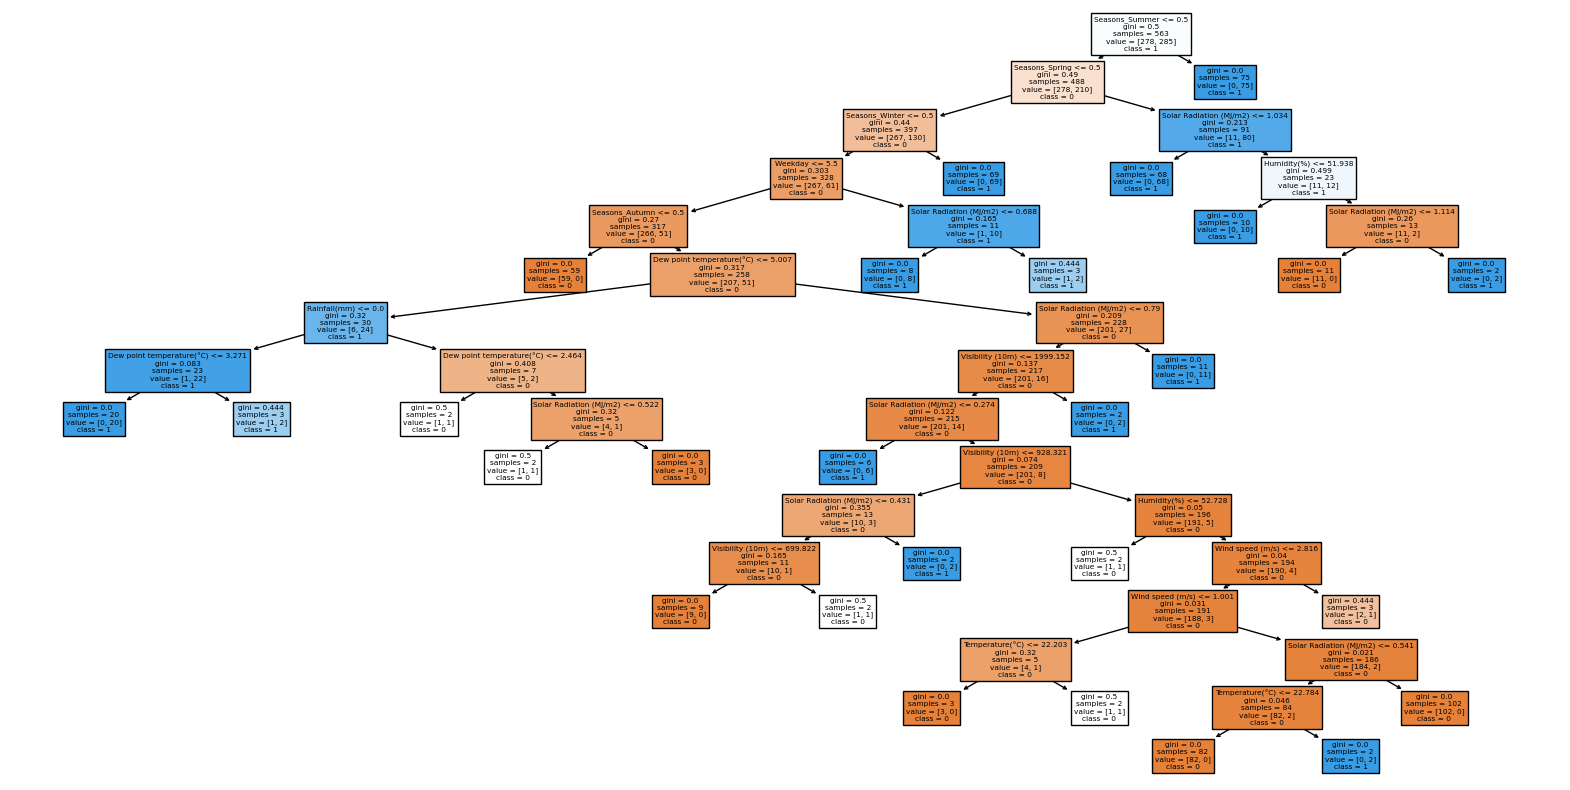

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.show()


## Non Parameter model: Random Forest

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# setup a random forest model and 

rf_model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=42)
rf_model.fit(X_train, y_train)

train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest training score is {train_accuracy}, test score is {test_accuracy}")

prediction = rf_model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print("Random Forest's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Random forest is {accuracy_score(y_test,prediction)}")

Random Forest training score is 0.955595026642984, test score is 0.9432624113475178
Random Forest's confusion matirx is:
[[73  1]
 [ 7 60]]
The AUC score for Random forest is 0.9432624113475178


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7,10],
    'min_samples_leaf': [1, 2, 3, 4]
}

#  since our dataset is small, use cv = 5 to reduce overfitting
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
# adjusted Random Forest Model
rf_model=RandomForestClassifier(**grid_search.best_params_)
rf_model.fit(X_train, y_train)

train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest training score is {train_accuracy}, test score is {test_accuracy}")

prediction = rf_model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print("Random Forest's confusion matirx is:")
print(confusionmatrix)
print(f"The AUC score for Random forest is {accuracy_score(y_test,prediction)}")

report = metrics.classification_report(y_test, rf_model.predict(X_test))
print("Classification metrics for Random Forest model:")
print(report)

Random Forest training score is 1.0, test score is 0.9645390070921985
Random Forest's confusion matirx is:
[[74  0]
 [ 5 62]]
The AUC score for Random forest is 0.9645390070921985
Classification metrics for Random Forest model:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.93      0.96        67

    accuracy                           0.96       141
   macro avg       0.97      0.96      0.96       141
weighted avg       0.97      0.96      0.96       141



C:\Users\Yahan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


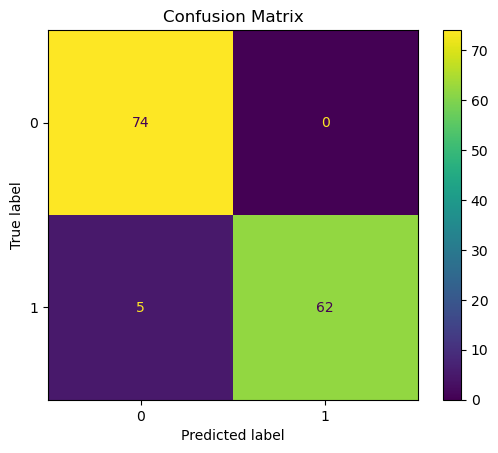

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

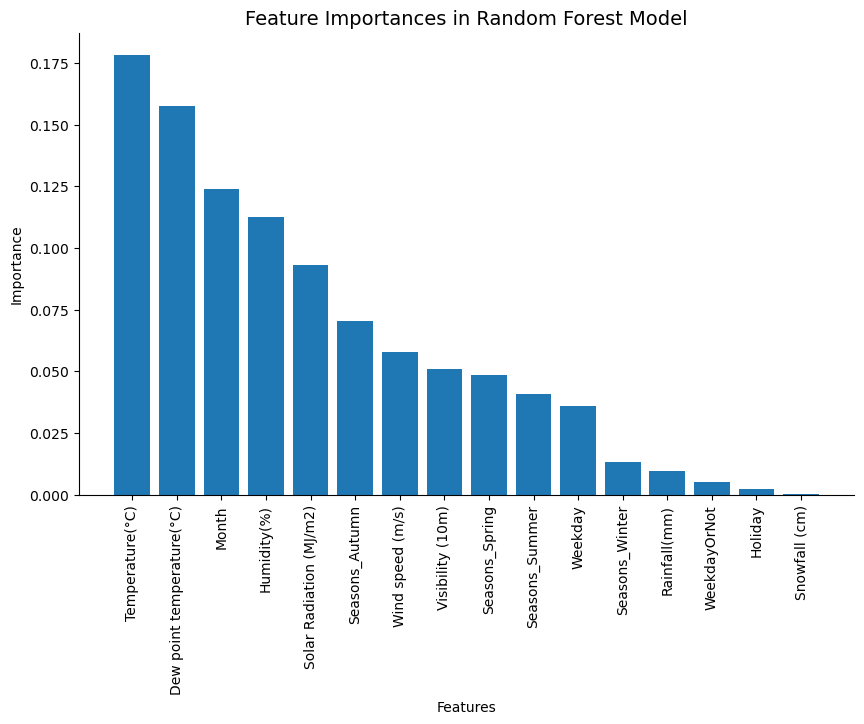

In [39]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_names

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest Model", fontsize = 14)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

## Parameter model: SVM 

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM model: {accuracy}')

print(svm_model.score(X_train,y_train))
print(svm_model.score(X_test,y_test))
report = metrics.classification_report(y_test, y_pred)
confusionmatrix = confusion_matrix(y_test,y_pred)
print("The confustion matrix of SVM is:")
print(confusionmatrix)
print(report)

Accuracy of SVM model: 0.8936170212765957
0.9005328596802842
0.8936170212765957
The confustion matrix of SVM is:
[[72  2]
 [13 54]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        74
           1       0.96      0.81      0.88        67

    accuracy                           0.89       141
   macro avg       0.91      0.89      0.89       141
weighted avg       0.90      0.89      0.89       141



In [ ]:
#hyperparamaters adjusting
from sklearn.svm import SVC

svm_model = SVC()

param_grid = {
    'C': [0.1,1,5,10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best SVM hyperparameters:", grid_search.best_params_)
print("Best SVM accuracy on testing set:", grid_search.score(X_test, y_test), "And the accuracy on training set is: ",
      grid_search.score(X_train, y_train))

# Regression

In [ ]:
FunctionBike = seoulBike[seoulBike["Functioning Day"] == "Yes"]
FunctionBike = FunctionBike.drop(columns="Functioning Day", axis=1)

FunctionBike_X = FunctionBike.drop(columns=["Rented Bike Count","Date"], axis=1)
FunctionBike_X["Holiday"] = FunctionBike_X["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
FunctionBike_X = pd.get_dummies(FunctionBike_X, columns=["Seasons"])
FunctionBike_y = FunctionBike["Rented Bike Count"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FunctionBike_X, FunctionBike_y, test_size = 0.2, random_state = 0)
X_train

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train.drop(["Dew point temperature(°C)","Visibility (10m)"], axis = 1))

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

X_test = sm.add_constant(X_test.drop(["Dew point temperature(°C)","Visibility (10m)"], axis = 1))
y_pred = model.predict(X_test)
print("Predictions:", y_pred)